# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Group Operations

### Exercise 13: GroupBy

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the cars dataset (cars.csv).

In [1]:
import pandas as pd

In [3]:
cars = pd.read_csv('cars.csv')

In [4]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


__Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

In [11]:
cars.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

The above shows us that the the USA's average mpg performance was by far the least.

__Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). Can you see a __trend__? __Visualize__!

In [17]:
year_mpg = cars.groupby('model_year')['mpg'].mean()
year_mpg

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

It appears that the overall average fuel effieciency increased over time.

<AxesSubplot:xlabel='model_year'>

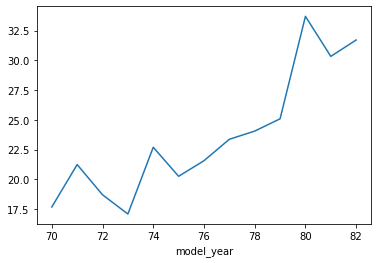

In [18]:
year_mpg.plot()

And the above line graph illustrates that.

__Calculate__ the mean/average mpg for each __combination of model_year & origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
Can you see the __same trend__ for all three orgins?

In [23]:
year_country_mpg = cars.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
year_country_mpg

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


<AxesSubplot:xlabel='model_year'>

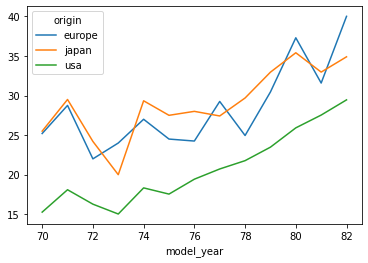

In [24]:
year_country_mpg.plot()

Above, we can see that the same general trend was true of all three regions of origin.  However, from 1975 on, the USA's general trend is more consistently increasing than the other two, despite still being worse overall.

Calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin!

In [25]:
year_country_mpg.agg(['mean', 'min', 'max'])

origin,europe,japan,usa
mean,28.401068,29.025748,20.682185
min,22.000000,20.000000,15.034483
max,40.000000,35.400000,29.450000


Return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__! <br>(hint: a __user defined function__ might help!)

In [31]:
cars.nlargest(2, 'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl


In [32]:
def two_most_efficient(group):
    return group.nlargest(2, 'mpg')

In [35]:
cars.groupby(['model_year', 'origin'])

In [42]:
top_models = cars.groupby(['model_year', 'origin'])[['name', 'mpg']].apply(two_most_efficient)
top_models

name   mpg
model_year origin                                             
70         europe 19                vw 1131 deluxe sedan  26.0
                  23                            bmw 2002  26.0
           japan  18                        datsun pl510  27.0
                  14               toyota corona mark ii  24.0
           usa    15                     plymouth duster  22.0
...                                                  ...   ...
82         europe 375                        vw rabbit l  36.0
           japan  383                        honda civic  38.0
                  385                      datsun 310 gx  38.0
           usa    378             plymouth horizon miser  38.0
                  387  oldsmobile cutlass ciera (diesel)  38.0

[78 rows x 2 columns]

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

In [46]:
cars.groupby(['model_year', 'origin']).mpg.mean()

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
72          europe    22.000000
            japan     24.200000
            usa       16.277778
73          europe    24.000000
            japan     20.000000
            usa       15.034483
74          europe    27.000000
            japan     29.333333
            usa       18.333333
75          europe    24.500000
            japan     27.500000
            usa       17.550000
76          europe    24.250000
            japan     28.000000
            usa       19.431818
77          europe    29.250000
            japan     27.416667
            usa       20.722222
78          europe    24.950000
            japan     29.687500
            usa       21.772727
79          europe    30.450000
            japan     32.950000
            usa       23.478261
80          europe   

In [47]:
cars['group_mean_mpg'] = cars.groupby(['model_year', 'origin']).mpg.transform('mean')
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mean_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,15.272727
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,15.272727
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,15.272727
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,15.272727
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,15.272727


In [49]:
cars['outliers'] = abs(cars.mpg - cars.group_mean_mpg)
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mean_mpg,outliers
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727,2.727273
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727,0.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727,2.727273
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727,0.727273
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727,1.727273
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,15.272727,0.272727
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,15.272727,1.272727
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,15.272727,1.272727
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,15.272727,1.272727
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,15.272727,0.272727


In [50]:
cars[cars.outliers > 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mean_mpg,outliers
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778,11.722222
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222,12.777778
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000,18.150000
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727,14.327273
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261,12.221739
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261,10.721739
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261,11.021739
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261,10.021739
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000,11.200000
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000,11.700000


------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#run the cell
cars = pd.read_csv("cars.csv")

In [ ]:
#run the cell
cars.head()

In [ ]:
#run the cell
cars.tail()

In [ ]:
#run the cell
cars.info()

117. __Group__ cars by the column __origin__ and __calculate__ the __mean__/average __mpg__ for each origin (mean mpg for usa, for europe and for japan)! <br>
Who built the __least__ fuel efficient cars?

The least fuel efficient cars are from ... usa.

118. __Group__ cars by the column __model_year__ and __calculate__ the __mean__/average __mpg__ for each model_year (mean mpg for 70, 71, 72,...)! <br>__Save__ the result in the variable __mpg_by_year__ and __round__ to two decimals!

In [ ]:
# run the cell
mpg_by_year

__Inspect__! Can you see a __trend__?

In [ ]:
# run the cell!
mpg_by_year.plot()
plt.show()

The cars are getting ... more fuel efficient over time.

119. __Group__ cars by the columns __model_year and origin__ and return the __mean mpg__ for each group! <br> __Save__ the resulting DataFrame in the variable __mpg_year_origin__!
__Column labels__ of mpg_year_origin shall be __europe__, __japan__ & __usa__. __Fill in the gaps__! 

In [ ]:
mpg_year_origin = cars.groupby(---).mpg.mean().---.round(2)

In [ ]:
# run the cell
mpg_year_origin

__Inspect__! Do we have the __same trend__ for europe, japan and usa?

In [ ]:
# run the cell
mpg_year_origin.plot()
plt.show()

It seems that manufacturer from europe, japan and usa were able to improve efficiency!

120. __Group__ cars by __model_year and origin__ and return __mean__, __max__ and __min mpg__ for all groups! __Fill in the gaps!__

In [ ]:
cars.groupby(["model_year", "origin"]).mpg.---(---).unstack().round(2)

Next, return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__!

121. First, __create__ the __user defined function__ get_most_efficient! __Fill in the gaps!__ 

In [ ]:
def get_most_efficient(group):
    return group.---(n = ---, columns = "mpg").loc[:, ["name", "mpg"]]

122. __Apply__ get_most_efficient on the appropriate __groupby object__! __Save__ the resulting DataFrame in the variable __most_eff__. __Fill in the gaps!__

In [ ]:
most_eff = cars.groupby([---, ---]).---(---)

Tidy up and __Inspect__!

In [ ]:
# run the cell
most_eff = most_eff.droplevel(-1)

In [ ]:
# run the cell
most_eff.head(10)

123. __Select__ the 2 most efficient cars from __japan__ in __1980__! __Fill in the gaps!__ The __most efficient__ car is...?

In [ ]:
most_eff.loc[---]

The most efficient car is... the mazda glc.

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!). Then, __filter__ all cars where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars all outliers/special cases in their respective group.

124. First, __group__ cars by __model_year & origin__ and calculate the __mean mpg__ for each group via the --- method to create the new column __"group_mpg"__. <br>
__Fill in the gaps!__

In [ ]:
cars["group_mpg"] = cars.groupby(["model_year", "origin"]).mpg.---(---).round(2)

__Inspect!__ The group-specific mpg for the vw pickup is ... ?

In [ ]:
# run the cell
cars.head()

In [ ]:
# run the cell
cars.tail()

The group-specific mpg for the vw pickup is... 40.0!

125. __Create__ the column __"mpg_outlier"__ by __substracting__ the __group_mpg__ column from the __mpg__ column. __Round__ to 2 decimals! 

In [ ]:
# run the cell
cars.mpg_outlier.describe()

126. __Filter__ cars for all cars/rows, where the __absolute value__ in the __mpg_outlier__ column is __greater than 10__! __Fill in the gaps!__<br>
There is only one car, that is __significantly less fuel efficient__ than it´s peer group. Which one?

In [ ]:
cars.loc[--- > 10]

The... mazda rx-7 gs is significantly less fuel efficient than it´s peer group (negative value in mpg_outlier column).

# Well Done!

-------------------

# Hints (Spolier!)

117. cars.groupby("---").---.mean()

118. mpg_by_year = cars.groupby("---").---.---.round(2)

119. Don´t forget unstack() method!


120. agg() method, unstack() method

121. nlargest() method; 

122. group cars by model_year & origin; pass get_most_efficient to the apply() method

123. outer index level: 80; inner index level: "japan"

124. transform() method

125. (_pandas series_ - _pandas series_).round()

126. abs() method